## Develop Hough Transform

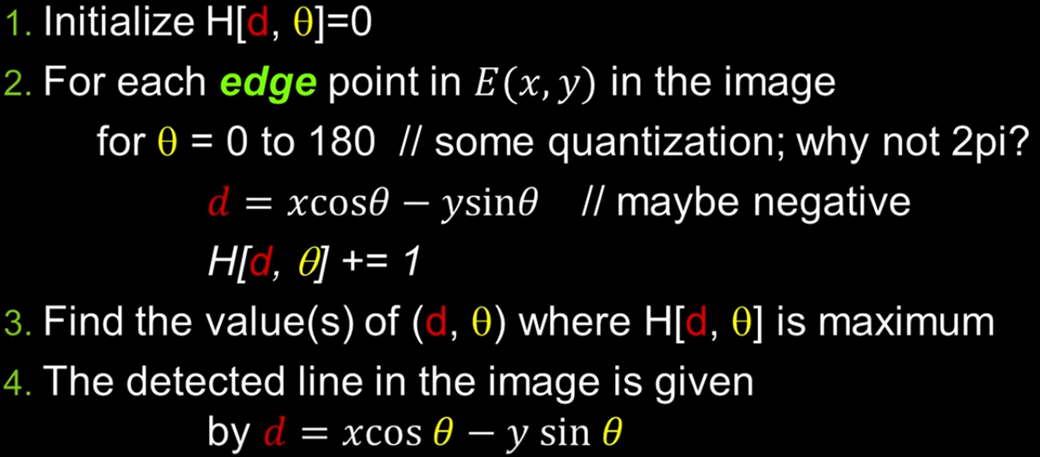

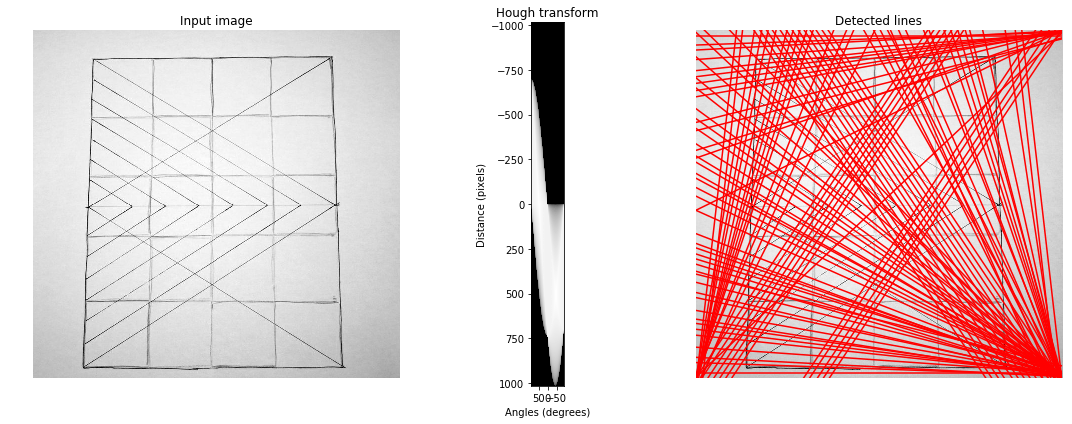

In [34]:
import numpy as np
from skimage import io
from skimage.transform import (hough_line, hough_line_peaks,probabilistic_hough_line)
from skimage.feature import canny
from skimage import data
import matplotlib.pyplot as plt
from matplotlib import cm

image =  io.imread('4ad0282118a046e4c3f0f58904f02603--free-motion-quilting-longarm-quilting.jpg', as_grey=True)
idx = np.arange(25, 75)
#image[idx[::-1], idx] = 255
#image[idx, idx] = 255

h, theta, d = hough_line(image)

fig, axes = plt.subplots(1, 3, figsize=(15, 6),subplot_kw={'adjustable': 'box-forced'})
ax = axes.ravel()

ax[0].imshow(image, cmap=cm.gray)
ax[0].set_title('Input image')
ax[0].set_axis_off()

ax[1].imshow(np.log(1 + h),extent=[np.rad2deg(theta[-1]), np.rad2deg(theta[0]), d[-1], d[0]],cmap=cm.gray, aspect=1/1.5)
ax[1].set_title('Hough transform')
ax[1].set_xlabel('Angles (degrees)')
ax[1].set_ylabel('Distance (pixels)')
ax[1].axis('image')

ax[2].imshow(image, cmap=cm.gray)
for _, angle, dist in zip(*hough_line_peaks(h, theta, d)):
    y0 = (dist - 0 * np.cos(angle)) / np.sin(angle)
    y1 = (dist - image.shape[1] * np.cos(angle)) / np.sin(angle)
    ax[2].plot((0, image.shape[1]), (y0, y1), '-r')
ax[2].set_xlim((0, image.shape[1]))
ax[2].set_ylim((image.shape[0], 0))
ax[2].set_axis_off()
ax[2].set_title('Detected lines')

plt.tight_layout()
plt.show()